# PART 1

# Importing All necessary Library

In [1]:
import csv
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Reading The Data

In [2]:
#Reading the data
data=pd.read_csv("churn data.csv")

#### it is a classification because its target variable is categorical, meaning it has a discrete classes or  categories that the data point belongs to,  yes or no which was converted to numerical in our previous capstone project  then the dataset is likely suitable for classification

In [3]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8.0,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22.0,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10.0,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28.0,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62.0,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


In [4]:
data.shape

(6951, 20)

# Exploratory Data Analysis (EDA)

In [5]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000
mean,0.504819,0.161559,0.482089,0.298087,32.388146,0.904330,0.939577,0.878003,0.793843,0.905193,0.904043,0.796432,0.984894,0.993526,0.687959,0.591282,1.575313,64.809833,2281.512718,0.266149
std,0.500013,0.368073,0.499715,0.457451,24.531961,0.294159,0.949110,0.736758,0.860113,0.879382,0.879257,0.860730,0.884349,0.884455,0.832797,0.491632,1.067258,30.145208,2268.858946,0.441975
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.450000,401.400000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,1391.650000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.900000,3783.200000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6951 non-null   int64  
 1   SeniorCitizen     6951 non-null   int64  
 2   Partner           6951 non-null   int64  
 3   Dependents        6951 non-null   int64  
 4   tenure            6951 non-null   float64
 5   PhoneService      6951 non-null   int64  
 6   MultipleLines     6951 non-null   int64  
 7   InternetService   6951 non-null   int64  
 8   OnlineSecurity    6951 non-null   int64  
 9   OnlineBackup      6951 non-null   int64  
 10  DeviceProtection  6951 non-null   int64  
 11  TechSupport       6951 non-null   int64  
 12  StreamingTV       6951 non-null   int64  
 13  StreamingMovies   6951 non-null   int64  
 14  Contract          6951 non-null   int64  
 15  PaperlessBilling  6951 non-null   int64  
 16  PaymentMethod     6951 non-null   int64  


# Finding Duplicates

In [7]:
print(data.duplicated().sum(), "Duplicate seen")

22 Duplicate seen


In [8]:
# OR
duplicate=data[data.duplicated()]

print("Duplicated Rows:")
duplicate

Duplicated Rows:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
901,1,0,0,0,1.0,1,0,0,0,0,0,0,0,0,0,1,3,45.70,45.70,1
1272,1,0,0,0,1.0,1,0,2,1,1,1,1,1,1,0,0,3,20.15,20.15,1
1424,0,0,0,0,1.0,1,0,2,1,1,1,1,1,1,0,0,3,19.55,19.55,0
1672,1,0,0,0,1.0,1,0,1,0,0,0,0,0,0,0,1,2,69.90,69.90,1
1863,1,0,0,0,1.0,1,0,2,1,1,1,1,1,1,0,0,3,20.20,20.20,0
2644,1,0,0,0,1.0,1,0,2,1,1,1,1,1,1,0,1,3,20.45,20.45,0
2823,1,0,0,0,1.0,1,0,2,1,1,1,1,1,1,0,0,3,20.45,20.45,0
3232,0,1,0,0,1.0,1,0,1,0,0,0,0,0,0,0,1,2,69.60,69.60,1
3684,1,0,0,0,1.0,1,0,2,1,1,1,1,1,1,0,0,3,20.05,20.05,0
4027,1,0,0,0,1.0,1,0,2,1,1,1,1,1,1,0,1,3,20.20,20.20,1


#### OBSERVATION 

In [9]:
# 22 dUPLICATED ROWS WAS OBSERVED

#### Dropping all Duplicate

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
print(data.duplicated().sum(), "Duplicate seen") # confirming if there is still duplicated row

0 Duplicate seen


In [12]:
data.shape

(6929, 20)

# null value checks

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6929 entries, 0 to 6950
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6929 non-null   int64  
 1   SeniorCitizen     6929 non-null   int64  
 2   Partner           6929 non-null   int64  
 3   Dependents        6929 non-null   int64  
 4   tenure            6929 non-null   float64
 5   PhoneService      6929 non-null   int64  
 6   MultipleLines     6929 non-null   int64  
 7   InternetService   6929 non-null   int64  
 8   OnlineSecurity    6929 non-null   int64  
 9   OnlineBackup      6929 non-null   int64  
 10  DeviceProtection  6929 non-null   int64  
 11  TechSupport       6929 non-null   int64  
 12  StreamingTV       6929 non-null   int64  
 13  StreamingMovies   6929 non-null   int64  
 14  Contract          6929 non-null   int64  
 15  PaperlessBilling  6929 non-null   int64  
 16  PaymentMethod     6929 non-null   int64  


In [14]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# there is no null value

In [16]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.000736,-0.000145,0.012534,0.005820,-0.010361,-0.006767,-0.003614,-0.013823,-0.012342,-0.000525,-0.008144,-0.004916,-0.010871,-0.000710,-0.011186,0.015443,-0.013445,-0.000071,-0.008559
SeniorCitizen,-0.000736,1.000000,0.014408,-0.213509,0.016126,0.007558,0.144662,-0.031268,-0.127072,-0.013613,-0.017490,-0.150133,0.031741,0.049567,-0.140286,0.156299,-0.037978,0.219609,0.103442,0.152081
Partner,-0.000145,0.014408,1.000000,0.450346,0.379840,0.020204,0.137688,0.005852,0.151673,0.154817,0.164641,0.125853,0.137019,0.131452,0.293365,-0.015770,-0.153690,0.094985,0.316855,-0.147118
Dependents,0.012534,-0.213509,0.450346,1.000000,0.160387,0.000917,-0.027563,0.049327,0.151260,0.091567,0.076676,0.132352,0.044167,0.020678,0.239884,-0.113539,-0.040924,-0.117064,0.060439,-0.162530
tenure,0.005820,0.016126,0.379840,0.160387,1.000000,0.007286,0.341749,-0.025130,0.331786,0.375062,0.369519,0.323491,0.289530,0.294348,0.675187,0.002756,-0.364829,0.243665,0.824844,-0.351247
PhoneService,-0.010361,0.007558,0.020204,0.000917,0.007286,1.000000,-0.019720,0.387760,-0.018076,0.025897,0.003203,-0.019355,0.055188,0.040657,0.004084,0.015442,-0.008659,0.246635,0.112229,0.012651
MultipleLines,-0.006767,0.144662,0.137688,-0.027563,0.341749,-0.019720,1.000000,-0.106696,0.007445,0.117588,0.122364,0.010093,0.173607,0.181053,0.109270,0.165675,-0.174576,0.433020,0.452089,0.040843
InternetService,-0.003614,-0.031268,0.005852,0.049327,-0.025130,0.387760,-0.106696,1.000000,-0.034817,0.037696,0.045947,-0.025635,0.108555,0.098231,0.105094,-0.140082,0.079169,-0.323349,-0.174269,-0.050581
OnlineSecurity,-0.013823,-0.127072,0.151673,0.151260,0.331786,-0.018076,0.007445,-0.034817,1.000000,0.188381,0.176666,0.285165,0.042625,0.055563,0.377745,-0.159885,-0.099389,-0.054409,0.256979,-0.291238
OnlineBackup,-0.012342,-0.013613,0.154817,0.091567,0.375062,0.025897,0.117588,0.037696,0.188381,1.000000,0.186896,0.195039,0.149303,0.136994,0.282080,-0.009605,-0.125576,0.121223,0.377848,-0.196968


In [17]:
#monthly charges has a vitae row on this dataset because it's highly correlated

In [18]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000
mean,0.504402,0.161928,0.483620,0.299033,32.487805,0.904027,0.942560,0.875884,0.794343,0.906047,0.904892,0.796940,0.986001,0.994660,0.690143,0.591716,1.571655,64.901385,2288.642438,0.265262
std,0.500017,0.368411,0.499768,0.457867,24.506931,0.294576,0.949135,0.736038,0.861006,0.880229,0.880105,0.861622,0.885119,0.885214,0.833214,0.491552,1.066677,30.123948,2268.921083,0.441504
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.650000,408.250000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.450000,1398.600000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.950000,3801.300000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


#### Splitting the Dataset into Dependent and Independent Variable (Y and X)

In [19]:
x=data.iloc[:,0:19]

In [20]:
y=data.iloc[:,-1]

In [21]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [22]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

#### Splitting the data into training and testing datasets. 

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Building a Logistic Regression model using training dataset

In [24]:
logreg=LogisticRegression()  # empty model

In [25]:
import warnings
warnings.filterwarnings("ignore")
logreg.fit(x_train,y_train) # we train the model using the train dataset

LogisticRegression()

#### Making predictions using the built model on test dataset.

In [26]:
y_pred=logreg.predict(x_test)

In [27]:
print('predicted value')
print(y_pred)
print('Actual value')
print(y_test)

predicted value
[0 1 0 ... 0 0 0]
Actual value
1044    0
888     0
3777    0
311     0
4681    0
       ..
349     0
2382    1
3060    0
3769    0
2272    0
Name: Churn, Length: 1386, dtype: int64


In [28]:
#Comparing the Actual and Predicted value

In [29]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2.head(10)

,Actual,Predicted
1044,0,0
888,0,1
3777,0,0
311,0,0
4681,0,0
5535,0,0
5436,0,0
3329,0,0
4665,1,0
4522,0,1


#### Evaluating the model using Confusion Matrix 

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [31]:
print('Accuracy', metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8102453102453102


In [32]:
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print("Classification Report for Testing Dataset:")
print(classification_report(y_test,y_pred))

[[940 105]
 [158 183]]
Classification Report for Testing Dataset:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1045
           1       0.64      0.54      0.58       341

    accuracy                           0.81      1386
   macro avg       0.75      0.72      0.73      1386
weighted avg       0.80      0.81      0.80      1386



In [33]:
# TN=942, TP=161, FP=103, FN=180

# Building a Support Vector Classifier (SVC) Model 

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [35]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
s_x= StandardScaler()    
x_train= s_x.fit_transform(x_train)    
x_test= s_x.transform(x_test)

In [36]:
# Building the Model using the Train dataset

In [37]:
svc_classifier= SVC(kernel='rbf',degree=2,random_state=0)  
svc_classifier.fit(x_train, y_train) 

SVC(degree=2, random_state=0)

#### Making predictions using the built model on test dataset.

In [38]:
y_pred= svc_classifier.predict(x_test)

In [39]:
print('predicted value')
print(y_pred)
print('Actual value')
print(y_test)

predicted value
[0 1 0 ... 0 0 0]
Actual value
1044    0
888     0
3777    0
311     0
4681    0
       ..
349     0
2382    1
3060    0
3769    0
2272    0
Name: Churn, Length: 1386, dtype: int64


In [40]:
#Comparing the Actual and Predicted value

In [41]:
df3=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df3.head(10)

,Actual,Predicted
1044,0,0
888,0,1
3777,0,0
311,0,0
4681,0,0
5535,0,0
5436,0,0
3329,0,0
4665,1,0
4522,0,0


#### Evaluating the model using Confusion Matrix 

In [42]:
print('Accuracy', metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8102453102453102


In [43]:
cfm1= confusion_matrix(y_test, y_pred)

In [44]:
print(cfm1)

[[967  78]
 [185 156]]


In [45]:
# TN=967, TP=156, FP=78, FN=185

In [46]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.8102453102453102


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1045
           1       0.67      0.46      0.54       341

    accuracy                           0.81      1386
   macro avg       0.75      0.69      0.71      1386
weighted avg       0.80      0.81      0.80      1386



In [48]:
# Get Support Vector indices
support_vector_indices= svc_classifier.support_
print(support_vector_indices)

[   6   13   16 ... 5526 5528 5533]


In [49]:
# Get number of support_vector per class
support_vector_per_class= svc_classifier.n_support_
print(support_vector_per_class)

[1468 1244]


# Creating a DecisionTree Classification Model

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [51]:
# Building the Model using the Train dataset

In [52]:
DT=DecisionTreeClassifier()
DT=DT.fit(x_train,y_train)

#### Making predictions using the built model on test dataset.

In [53]:
y_pred=DT.predict(x_test)

In [54]:
print('predicted value')
print(y_pred)
print('Actual value')
print(y_test)

predicted value
[0 0 0 ... 0 0 0]
Actual value
1044    0
888     0
3777    0
311     0
4681    0
       ..
349     0
2382    1
3060    0
3769    0
2272    0
Name: Churn, Length: 1386, dtype: int64


In [55]:
#Comparing the Actual and Predicted value

In [56]:
df4=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df4.head(10)

,Actual,Predicted
1044,0,0
888,0,0
3777,0,0
311,0,0
4681,0,1
5535,0,0
5436,0,0
3329,0,0
4665,1,0
4522,0,0


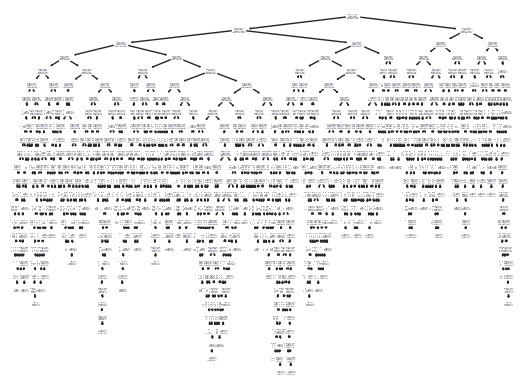

In [57]:
tree.plot_tree(DT)
plt.savefig('o1.pdf')

#### Evaluating the model using Confusion Matrix 

In [58]:
print('Accuracy', metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7373737373737373


In [59]:
cfM2=confusion_matrix(y_test,y_pred)
print(cfM2)

[[854 191]
 [173 168]]


In [60]:
# TN=854, TP=168,FP=191, FN=173

In [61]:
print("Classfication Report for testing dataset:")
print(classification_report(y_test,y_pred))

Classfication Report for testing dataset:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1045
           1       0.47      0.49      0.48       341

    accuracy                           0.74      1386
   macro avg       0.65      0.65      0.65      1386
weighted avg       0.74      0.74      0.74      1386



# Creating KNN Classification Model

In [62]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
KNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)  # Hyper Parameter
KNN.fit(x_train, y_train)

KNeighborsClassifier()

#### Making predictions using the built model on test dataset.

In [63]:
y_pred=KNN.predict(x_test)
print('predicted value')
print(y_pred)
print('Actual value')
print(y_test)

predicted value
[0 0 0 ... 0 0 0]
Actual value
1044    0
888     0
3777    0
311     0
4681    0
       ..
349     0
2382    1
3060    0
3769    0
2272    0
Name: Churn, Length: 1386, dtype: int64


In [64]:
#Comparing the Actual and Predicted value

In [65]:
df5=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df5.head(10)

,Actual,Predicted
1044,0,0
888,0,0
3777,0,0
311,0,0
4681,0,0
5535,0,0
5436,0,0
3329,0,0
4665,1,1
4522,0,1


#### Evaluating the model using Confusion Matrix 

In [66]:
print('Accuracy', metrics.accuracy_score(y_test,y_pred))

Accuracy 0.766955266955267


In [67]:
cfm3=confusion_matrix(y_test,y_pred)
print(cfm3)

[[887 158]
 [165 176]]


In [68]:
# TN=887, TP=176, FP=158, FN=165

In [69]:
print('Classification Report for Test Dataset')
print(classification_report(y_test,y_pred))

Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1045
           1       0.53      0.52      0.52       341

    accuracy                           0.77      1386
   macro avg       0.69      0.68      0.68      1386
weighted avg       0.77      0.77      0.77      1386



# Building a random forest classifier model

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
RFC=RandomForestClassifier()

In [72]:
#Fitting RANDOM FOREST classifier to the training set

In [73]:
RFC=RFC.fit(x_train,y_train)

# Making predictions using the built model on test dataset.

In [74]:
y_pred=RFC.predict(x_test)
print('predicted value')
print(y_pred)
print('Actual value')
print(y_test)

predicted value
[0 0 0 ... 0 0 0]
Actual value
1044    0
888     0
3777    0
311     0
4681    0
       ..
349     0
2382    1
3060    0
3769    0
2272    0
Name: Churn, Length: 1386, dtype: int64


In [75]:
#Comparing the Actual and Predicted value
df6=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df6.head(10)

,Actual,Predicted
1044,0,0
888,0,0
3777,0,0
311,0,0
4681,0,0
5535,0,0
5436,0,0
3329,0,0
4665,1,1
4522,0,0


# Evaluating the model for accuracy

In [76]:
print('Accuracy', metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8051948051948052


In [77]:
cf4=confusion_matrix(y_test,y_pred)
print(cf4)

[[945 100]
 [170 171]]


In [78]:
print('Classification Report for test dataset')
print(classification_report(y_test,y_pred))

Classification Report for test dataset
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1045
           1       0.63      0.50      0.56       341

    accuracy                           0.81      1386
   macro avg       0.74      0.70      0.72      1386
weighted avg       0.79      0.81      0.80      1386



In [79]:
#Logistic Regression = 0.8102453102453102  Approximately  0.81
#SVC = 0.8102453102453102   Approximately 0.81
#DecisionTreeClassifier = 0.7373737373737373   Approximately  0.74
#KNeighboursClassifier= 0.766955266955267   Approximately  0.77
#RandomForestClassifier= 0.8051948051948052   Approximately 0.81

# CONCLUSION
i observed that Logistic Regression and SVC model has exactly the same accuracy and are also the highest accurate model, follow by Random Forest

# PART 2

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
models=[] # is empty
scores=[] # is empty

# GridSearchCV- LogisticRegression

In [82]:
parameters = {'penalty':['l1', 'l2']}        
c1 = LogisticRegression()
grid = GridSearchCV(c1, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c1)   
scores.append(grid.best_score_)   


{'penalty': 'l2'}
LogisticRegression()
0.8005505092210294


# GridSearchCV- Support Vector Classifier(SVC)

In [83]:
parameters = {'C': [0.01, 0.05],
              'degree': [2, 3],
              'gamma':[0.001, 0.01],
              'kernel': ['rbf']
              }        
c2 = SVC()
grid = GridSearchCV(c2, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c2)   
scores.append(grid.best_score_)

{'C': 0.05, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=0.05, degree=2, gamma=0.001)
0.7623051322473288


# GrdidSearchCV- DecisionTreeClassifier

In [84]:
parameters = {'criterion':['gini', 'entropy'],
              'splitter':['best', 'random']
              }        
c3 = DecisionTreeClassifier()
grid = GridSearchCV(c3, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c3)  
scores.append(grid.best_score_)

{'criterion': 'entropy', 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', splitter='random')
0.7298353059913754


# GridSearchCV- KNeighborsClassifier(KNN)

In [85]:
parameters = {'n_neighbors': range(30),
              'metric':['manhattan','euclidean']}        
c4 = KNeighborsClassifier()  
grid = GridSearchCV(c4, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c4)     
scores.append(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 27}
KNeighborsClassifier(metric='manhattan', n_neighbors=27)
0.7869846274470552


# GridSearchCV- RandomForestClassifier

In [86]:
parameters = {'n_estimators':range(20),
              'criterion':['gini','entropy']}        
c5 = RandomForestClassifier()  
grid = GridSearchCV(c5, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


models.append(c5)      
scores.append(grid.best_score_)

{'criterion': 'entropy', 'n_estimators': 17}
RandomForestClassifier(criterion='entropy', n_estimators=17)
0.789004412414817


In [87]:
#Creating a dataframe to store the result of GridSearchCV for all the models which will includes model_name, 
#best_score_ and best_parameters

In [88]:
result_data=pd.DataFrame({"Models":models,"Score":scores})
print(result_data)

                     Models     Score
0      LogisticRegression()  0.800551
1                     SVC()  0.762305
2  DecisionTreeClassifier()  0.729835
3    KNeighborsClassifier()  0.786985
4  RandomForestClassifier()  0.789004


# PART 3

# CONCLUSION
####  We explored multiple machine learning algorithms,which includes logistic regression, random forests, KNN, Decision Tree and support vector Classifier. Through rigorous evaluation using metrics such as Confusion Matrix, accuracy, precision, recall, and F1-score, we identified the most suitable model for churn prediction.
#### After the rigorous evaluation and hyperparameter tuning. Our results demonstrate that the Logistic Regression algorithm emerged as the top performance, achieving an accuracy of 81%  . This indicates the model's ability to effectively distinguish between churners and non-churners